In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime


pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to /home/zchao3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## In Media Bias Chart Ver. 5.0, there are 1916 media articles reviewed. Here we take the average of Bias/Quality for each media

In [2]:
# Load all article reviews:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,Al Jazeera,-3.705333,46.700000
3,Alternet,-19.156250,26.385000
4,"American Spectator, The",21.767778,23.481111
5,Axios,-5.737857,47.303571
6,BBC,-3.033333,46.266667
7,Bipartisan Report,-23.550667,21.928667
8,Bloomberg,-0.850345,47.522759
9,Breitbart,18.987857,30.637143


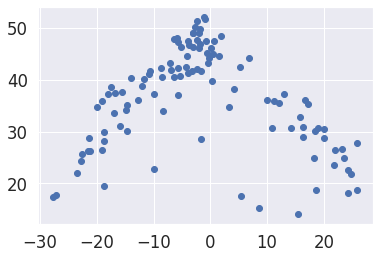

In [3]:
plt.scatter(media_bias['Bias'].to_numpy(),media_bias['Quality'].to_numpy())

[]

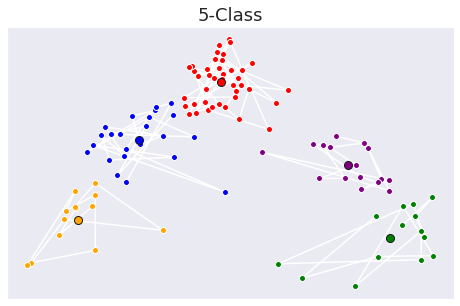

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
centers = [[-20, 20], [-10, 35], [0, 50], [10, 35], [20, 20]]
n_clusters = len(centers)
X = media_bias[['Bias','Quality']].to_numpy()
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
k_means.fit(X)

colors = ['red', 'orange', 'green','blue','purple']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=12)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('5-Class')
ax.set_xticks(())
ax.set_yticks(())

In [5]:
k_means_labels

array([0, 0, 0, 1, 2, 0, 0, 1, 0, 4, 0, 0, 0, 3, 2, 0, 2, 4, 3, 1, 3, 4,
       1, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 3, 4, 1, 1, 3, 0, 2, 3, 3, 0, 2,
       3, 0, 3, 2, 0, 4, 3, 0, 0, 3, 4, 2, 0, 0, 1, 4, 0, 4, 1, 1, 0, 0,
       3, 0, 0, 2, 0, 1, 1, 3, 2, 0, 3, 4, 0, 4, 0, 2, 2, 0, 0, 3, 0, 0,
       3, 3, 0, 1, 2, 0, 3, 3, 3, 3, 0, 4, 4, 3, 0, 4, 0, 1, 2, 2])

In [6]:
# A hand-make dictionary mapping each media in MediaBiasChart_to_Tweet to their twitter account
# The full list of media twitter account is from news_outlet_tweet_IDs
# at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2FIFLH

MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'ProPublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias.Source.map(MediaBiasChart_to_Tweet)

0      ABC            
1      AP             
2      NaN            
3      NaN            
4      NaN            
5      axios          
6      BBC            
7      NaN            
8      Bloomberg      
9      BreitbartNews  
10     businessinsider
11     BuzzFeed       
12     CBSNews        
13     CNN            
14     cnsnews        
15     csmonitor      
16     NaN            
17     NaN            
18     NaN            
19     NaN            
20     thedailybeast  
21     DailyCaller    
22     NaN            
23     NaN            
24     DailySignal    
25     NaN            
26     democracynow   
27     NaN            
28     FT             
29     TheFiscalTimes 
30     Forbes         
31     ForeignPolicy  
32     FortuneMagazine
33     jdforward      
34     FoxNews        
35     freespeechtv   
36     NaN            
37     HuffPost       
38     TheIJR         
39     NaN            
40     NaN            
41     NaN            
42     latimes        
43     NaN 

In [7]:
media_bias['Source'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,axios,-5.737857,47.303571
3,BBC,-3.033333,46.266667
4,Bloomberg,-0.850345,47.522759
5,BreitbartNews,18.987857,30.637143
6,businessinsider,-0.378000,43.283333
7,BuzzFeed,-7.061333,43.167333
8,CBSNews,-1.846154,46.839231
9,CNN,-8.553827,40.487716


In [8]:
media_list = media_bias['Source'].tolist()
print(media_list)

['ABC', 'AP', 'axios', 'BBC', 'Bloomberg', 'BreitbartNews', 'businessinsider', 'BuzzFeed', 'CBSNews', 'CNN', 'cnsnews', 'csmonitor', 'thedailybeast', 'DailyCaller', 'DailySignal', 'democracynow', 'FT', 'TheFiscalTimes', 'Forbes', 'ForeignPolicy', 'FortuneMagazine', 'jdforward', 'FoxNews', 'freespeechtv', 'HuffPost', 'TheIJR', 'latimes', 'MSNBC', 'MarketWatch', 'MotherJones', 'NPR', 'NRO', 'newrepublic', 'nypost', 'nytimes', 'newsmax', 'ozy', 'OANN', 'PBS', 'politico', 'ProPublica', 'qz', 'reason', 'Reuters', 'Slate', 'TPM', 'TheAtlantic', 'theblaze', 'TheEconomist', 'FDRLST', 'thehill', 'thenation', 'NewYorker', 'TheWeek', 'thinkprogress', 'TIME', 'USATODAY', 'VanityFair', 'voxdotcom', 'WSJ', 'dcexaminer', 'FreeBeacon', 'washingtonpost', 'WashTimes', 'weatherchannel']


In [9]:
tweets_df = pd.read_csv('../data/news_outlets_part1.csv')
tweets_df = tweets_df[['user_screen_name','text','created_at','hashtags']]
tweets_df_filtered = tweets_df[tweets_df['user_screen_name'].isin(media_list)]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
tweets_df_filtered.shape

(421228, 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


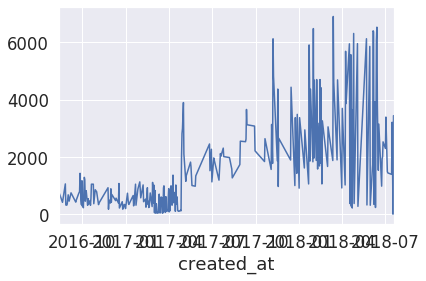

In [13]:
tweets_df_filtered['created_at'] = pd.to_datetime(tweets_df_filtered['created_at'])
tweets_df_filtered.groupby(tweets_df_filtered['created_at'].dt.date).size().plot()

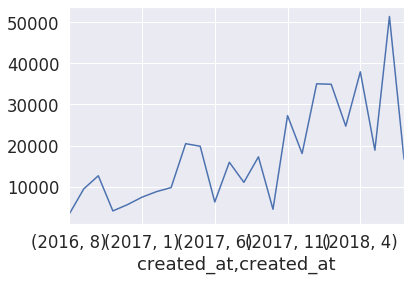

In [14]:
tweets_df_filtered.groupby([tweets_df_filtered['created_at'].dt.year, tweets_df_filtered['created_at'].dt.month]).size().plot()

In [16]:
tweets_df_filtered.to_csv('../data/filtered_part1.csv', index = False)